In [1]:
from skimpy import skim #data summary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import charset_normalizer
import seaborn as sns
import plotly.express as px #interactive visualization
import charset_normalizer
import plotly.graph_objects as go

In [2]:
with open("visualizing_global_co2_data_cleaned.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))
print(result)

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


In [3]:
data = pd.read_csv('visualizing_global_co2_data_cleaned.csv', encoding = 'ascii')
df = pd.DataFrame(data)


In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 23494  │ │ float64     │ 52    │                                                          │
│ │ Number of columns │ 55     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃      ┃       ┃          ┃           ┃        ┃         ┃         ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA   ┃ NA %  ┃ mean     ┃ sd        ┃ p0     ┃ p25     ┃ p50     ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ year     │    0 │     0 │     1962 │     42.91 │   1850 │    1935 │    1970 │     1997 │     2021 │ ▂▂▃▅▇▇ │  │
│ │ populati │  926 │  3.94 │ 92860000 │ 418500000 │   1480 │ 1415000 │ 5340000 │ 21760000 │ 79090000 │   ▇    │  │
│ │ on       │      │       │          │           │        │         │         │          │       00 │        │  │
│ │ cement_c │ 3502 │ 14.91 │    10.48 │     70.27 │      0 │       0 │   0.116 │    1.287 │     1673 │   ▇    │  │
│ │ o2       │      │       │          │           │        │         │         │          │          │        │  │
│ │ cement_c │ 3574 │ 15.21 │  0.07293 │    0.1289 │      0 │       0 │   0.016 │    0.104 │    2.574 │   ▇    │  │
│ │ o2_per_c │      │       │          │           │        │         │         │          │          │        │  │
│ │ apita    │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2      │    0 │     0 │    348.1 │      1755 │      0 │   0.575 │    5.27 │    50.21 │    37120 │   ▇    │  │
│ │ co2_grow │  269 │  1.14 │     7.04 │     65.47 │  -1818 │  -0.011 │   0.073 │    1.268 │     1860 │    ▇▁  │  │
│ │ th_abs   │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_grow │  307 │  1.31 │    21.44 │     725.4 │   -100 │  -0.893 │   4.088 │    10.93 │   102300 │   ▇    │  │
│ │ th_prct  │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_incl │  953 │  4.06 │      535 │      2153 │   -187 │   6.346 │   28.74 │    129.1 │    41640 │   ▇    │  │
│ │ uding_lu │      │       │          │           │        │         │         │          │          │        │  │
│ │ c        │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_incl │ 1232 │  5.24 │    7.797 │     96.02 │  -2318 │  -0.722 │   0.103 │    2.747 │     2247 │     ▇  │  │
│ │ uding_lu │      │       │          │           │        │         │         │          │          │        │  │
│ │ c_growth │      │       │          │           │        │         │         │          │          │        │  │
│ │ _abs     │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_incl │ 1166 │  4.96 │    13.01 │     732.1 │ -36

In [5]:
 info = pd.DataFrame({
    "Count":df.shape[0],
    "Null":df.isnull().sum(),
    "Null %":df.isnull().mean() * 100,
    "Zeros":(df == 0).sum(),
    "Zeros %":(df == 0).mean() * 100,
    "Unique":df.nunique(),
    "Duplicated":(df.duplicated() == True).sum(),
  
})
info
print(df["country"].nunique())

print(df["iso_code"].nunique())
print(df["country"].unique())


237
219
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia'
 'Asia (excl. China and India)' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'European Union (27)'
 'European Union (28)' 'Faroe Islands' '

In [44]:
non_countries = [
    "Africa", "Asia", "Asia (excl. China and India)", "Europe", "Europe (excl. EU-27)",
    "Europe (excl. EU-28)", "European Union (27)", "European Union (28)", 
    "High-income countries", "Low-income countries", "Lower-middle-income countries", 
    "North America", "North America (excl. USA)", "Oceania", "South America",'Upper-middle-income countries', "World"
]

countries = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize',
 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands',
 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador',
 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
 'Faroe Islands', 'Fiji', 'Finland', 'France',
 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guinea',
 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary',
 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia',
 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',
 'Luxembourg', 'Macao', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte',
 'Mexico', 'Micronesia (country)', 'Moldova', 'Mongolia', 'Montenegro',
 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal',
 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
 'Niue', 'North Korea', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau',
 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines',
 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Reunion', 'Romania', 'Russia',
 'Rwanda', 'Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia',
 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa',
 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia',
 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Korea',
 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname',
 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania',
 'Thailand', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine',
 'United Arab Emirates', 'United Kingdom', 'United States',
 'Uruguay', 'Uzbekistan', 'Vanuatu',
 'Venezuela', 'Vietnam', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']

df_filtered_country = df[df["country"].isin(countries)].copy()

df_filtered_non_country = df[df["country"].isin(non_countries)].copy()

print(df_filtered_country["country"].unique())
print(df_filtered_country["country"].nunique())
print(df_filtered_non_country["country"].nunique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Greenland' 'Grenada' 'Guadeloupe' 'Guat

#Eliminar datos C02 = 0

In [7]:
co2_zeros = (df["co2"] == 0).sum()

df = df.drop(df[df["co2"] == 0].index)
print(co2_zeros)

102


In [8]:
df_it1 = df[["country","year","co2","co2_including_luc"]]


info1 = pd.DataFrame({import plotly.graph_objects as go
    "Count":df_it1.shape[0],
    "Null":df_it1.isnull().sum(),
    "Null %":df_it1.isnull().mean() * 100,
    "Zeros":(df_it1 == 0).sum(),
    "Zeros %":(df_it1 == 0).mean() * 100,
    "Unique":df_it1.nunique(),
    "Duplicated":(df_it1.duplicated() == True).sum(),
    "Under Zeros":(df_it1["co2_including_luc"] < 0).sum() 
})
info1

,Count,Null,Null %,Zeros,Zeros %,Unique,Duplicated,Under Zeros
country,23392,0,0.000000,0,0.0000,237,0,369
year,23392,0,0.000000,0,0.0000,172,0,369
co2,23392,0,0.000000,0,0.0000,14458,0,369
co2_including_luc,23392,953,4.074042,8,0.0342,18675,0,369


In [9]:

df_it1 = df[[ "year", "co2", "co2_including_luc"]].copy()


info1 = pd.DataFrame({
    "Count": [df_it1.shape[0]] * len(df_it1.columns),
    "Null": df_it1.isnull().sum(),
    "Null %": df_it1.isnull().mean() * 100,
    "Zeros": (df_it1 == 0).sum(),
    "Zeros %": (df_it1 == 0).mean() * 100,
    "Unique": df_it1.nunique(),
    "Duplicated": [df_it1.duplicated().sum()] * len(df_it1.columns),
    "Under Zeros": (df_it1 < 0).sum()
}, index=df_it1.columns)

print(info1)
df_it1["country"] =df["country"]
df_it1.columns

                   Count  Null    Null %  Zeros  Zeros %  Unique  Duplicated  \
year               23392     0  0.000000      0   0.0000     172         132   
co2                23392     0  0.000000      0   0.0000   14458         132   
co2_including_luc  23392   953  4.074042      8   0.0342   18675         132   

                   Under Zeros  
year                         0  
co2                          0  
co2_including_luc          369  


Index(['year', 'co2', 'co2_including_luc', 'country'], dtype='object')

Imputamos el valor de Co2 a co2_including_luc, cuando co2_including_luc < 0

### Which sectors are most responsible for emissions, and how has their
### contribution varied over the decades?

In [10]:
df_it2 = df[[ "year","cement_co2", "coal_co2","flaring_co2", "gas_co2","land_use_change_co2", "oil_co2"]].copy()

info2 = pd.DataFrame({
    "Count": [df_it2.shape[0]] * len(df_it2.columns),
    "Null": df_it2.isnull().sum(),
    "Null %": df_it2.isnull().mean() * 100,
    "Zeros": (df_it2 == 0).sum(),
    "Zeros %": (df_it2 == 0).mean() * 100,
    "Unique": df_it2.nunique(),
    "Duplicated": [df_it2.duplicated().sum()] * len(df_it2.columns),
    "Under Zeros": (df_it2 < 0).sum()
}, index=df_it2.columns)

print(info2)

                     Count  Null     Null %  Zeros    Zeros %  Unique  \
year                 23392     0   0.000000      0   0.000000     172   
cement_co2           23392  3481  14.881156   7056  30.164159    5261   
coal_co2             23392     0   0.000000   6719  28.723495   10076   
flaring_co2          23392    95   0.406122  18370  78.531122    3266   
gas_co2              23392    27   0.115424  14120  60.362517    6168   
land_use_change_co2  23392   953   4.074042    915   3.911594    7001   
oil_co2              23392     0   0.000000   2335   9.982045   10528   

                     Duplicated  Under Zeros  
year                        112            0  
cement_co2                  112            0  
coal_co2                    112            0  
flaring_co2                 112            0  
gas_co2                     112            0  
land_use_change_co2         112         3470  
oil_co2                     112            0  


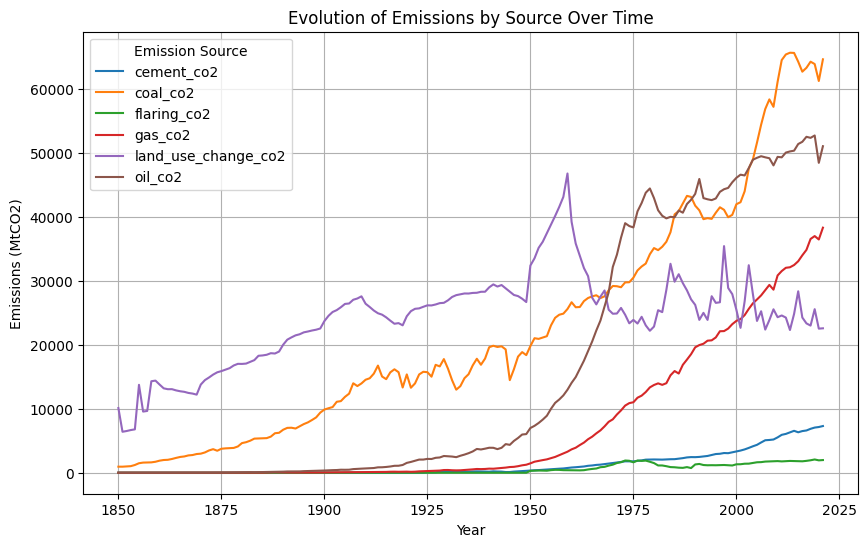

In [11]:
df_it2_grouped = df_it2.groupby("year").sum().reset_index()

plt.figure(figsize=(10, 6))

for column in df_it2_grouped.columns[1:]:
    plt.plot(df_it2_grouped["year"], df_it2_grouped[column], label=column)

plt.xlabel("Year")
plt.ylabel("Emissions (MtCO2)")
plt.title("Evolution of Emissions by Source Over Time")
plt.legend(title="Emission Source")
plt.grid(True)
plt.show()

#Total Co2 agrupado en años

## histograma de valores nulos de cement

            Count  Null  Null %  Zeros  Zeros %  Unique  Duplicated  \
year         3481     0     0.0      0      0.0     131        3350   
cement_co2   3481  3481   100.0      0      0.0       0        3350   

            Under Zeros  
year                  0  
cement_co2            0  


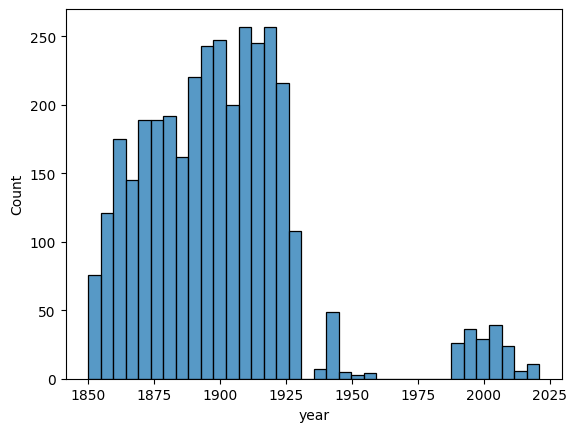

In [12]:
df_cement_nulls = df[df["cement_co2"].isnull()][["year", "cement_co2"]]
df_cement_nulls.head()

info_cement = pd.DataFrame({
    "Count": [df_cement_nulls.shape[0]] * len(df_cement_nulls.columns),
    "Null": df_cement_nulls.isnull().sum(),
    "Null %": df_cement_nulls.isnull().mean() * 100,
    "Zeros": (df_cement_nulls == 0).sum(),
    "Zeros %": (df_cement_nulls == 0).mean() * 100,
    "Unique": df_cement_nulls.nunique(),
    "Duplicated": [df_cement_nulls.duplicated().sum()] * len(df_cement_nulls.columns),
    "Under Zeros": (df_cement_nulls < 0).sum()
}, index=df_cement_nulls.columns)

print(info_cement)

sns.histplot(data=df_cement_nulls, x="year")
plt.show()

## Después de comprobar los datos nulos y ver su irrelevancia, procedemos a eliminarlos.

In [13]:
df = df[~(df['cement_co2'].isnull() & (df['year'] > 1930))]
df

,country,year,iso_code,population,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
0,Afghanistan,1949,AFG,7356890.0,0.000,0.000,0.015,NaN,NaN,8.039,...,0.000,NaN,0.0,0.160,0.000,0.129,0.000,0.000,0.000,0.0
1,Afghanistan,1950,AFG,7480464.0,0.000,0.000,0.084,0.070,475.000,8.585,...,0.000,0.0,0.0,0.157,0.004,0.129,0.000,0.000,0.000,0.0
2,Afghanistan,1951,AFG,7571542.0,0.000,0.000,0.092,0.007,8.696,9.142,...,0.000,0.0,0.0,0.162,0.004,0.129,0.000,0.000,0.001,0.0
3,Afghanistan,1952,AFG,7667534.0,0.000,0.000,0.092,0.000,0.000,9.948,...,0.001,0.0,0.0,0.172,0.003,0.129,0.000,0.000,0.001,0.0
4,Afghanistan,1953,AFG,7764549.0,0.000,0.000,0.106,0.015,16.000,10.915,...,0.001,0.0,0.0,0.185,0.003,0.129,0.000,0.000,0.001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23489,Zimbabwe,2017,ZWE,14751101.0,0.469,0.032,9.596,-0.937,-8.899,19.086,...,0.024,0.0,0.0,0.219,0.026,0.114,0.001,0.001,0.002,0.0
23490,Zimbabwe,2018,ZWE,15052191.0,0.558,0.037,11.795,2.199,22.920,20.626,...,0.025,0.0,0.0,0.211,0.033,0.114,0.001,0.001,0.002,0.0
23491,Zimbabwe,2019,ZWE,15354606.0,0.570,0.037,11.115,-0.681,-5.772,19.432,...,0.025,0.0,0.0,0.183,0.030,0.113,0.001,0.001,0.002,0.0
23492,Zimbabwe,2020,ZWE,15669663.0,0.570,0.036,10.608,-0.507,-4.559,18.485,...,0.025,0.0,0.0,0.194,0.030,0.112,0.001,0.001,0.002,0.0


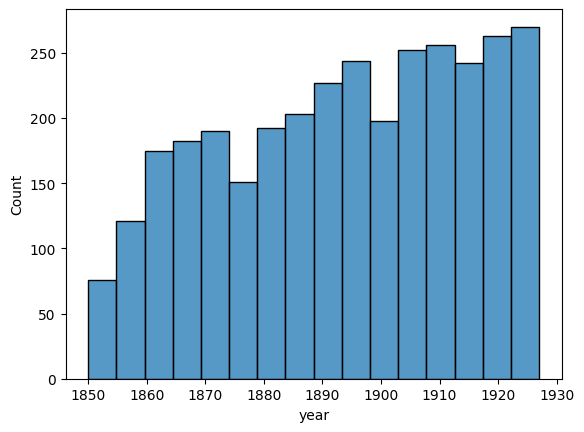

In [14]:
df_cement_nulls = df[df["cement_co2"].isnull()][["year", "cement_co2"]]

sns.histplot(data=df_cement_nulls, x="year")
plt.show()

                     Count  Null     Null %  Zeros    Zeros %  Unique  \
year                 23392     0   0.000000      0   0.000000     172   
cement_co2           23392  3481  14.881156   7056  30.164159    5261   
coal_co2             23392     0   0.000000   6719  28.723495   10076   
flaring_co2          23392    95   0.406122  18370  78.531122    3266   
gas_co2              23392    27   0.115424  14120  60.362517    6168   
land_use_change_co2  23392   953   4.074042    915   3.911594    7001   
oil_co2              23392     0   0.000000   2335   9.982045   10528   

                     Duplicated  Under Zeros  
year                        112            0  
cement_co2                  112            0  
coal_co2                    112            0  
flaring_co2                 112            0  
gas_co2                     112            0  
land_use_change_co2         112         3470  
oil_co2                     112            0  
                                 year  

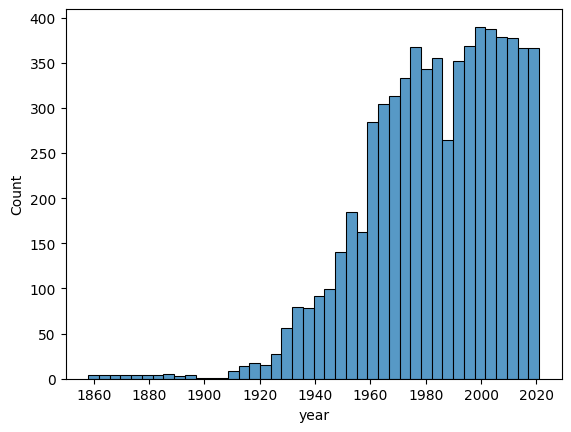

In [15]:
info_oil = pd.DataFrame({
    "Count": [df_it2.shape[0]] * len(df_it2.columns),
    "Null": df_it2.isnull().sum(),
    "Null %": df_it2.isnull().mean() * 100,
    "Zeros": (df_it2 == 0).sum(),
    "Zeros %": (df_it2 == 0).mean() * 100,
    "Unique": df_it2.nunique(),
    "Duplicated": [df_it2.duplicated().sum()] * len(df_it2.columns),
    "Under Zeros": (df_it2 < 0).sum()
}, index=df_it2.columns)

print(info_oil)

df_coal_zero = df[df["coal_co2"] == 0][["year", "coal_co2","country"]]

df_coal_zero_grouped = df_coal_zero.groupby("country").count()
print(df_coal_zero_grouped.sort_values(by="coal_co2"))

print(df_coal_zero["country"].unique())
sns.histplot(data=df_coal_zero, x="year")
plt.show()

### Unificamos criterios

los nulos pasan a ser ceros.

In [3]:
columns_to_check = ["cement_co2", "coal_co2", "flaring_co2", "gas_co2", "land_use_change_co2", "oil_co2"]

df[columns_to_check] = df[columns_to_check].fillna(0)

info = pd.DataFrame({
    "Count": [df.shape[0]] * len(columns_to_check),
    "Null": df[columns_to_check].isnull().sum(),
    "Null %": df[columns_to_check].isnull().mean() * 100,
    "Zeros": (df[columns_to_check] == 0).sum(),
    "Zeros %": (df[columns_to_check] == 0).mean() * 100,
    "Unique": df[columns_to_check].nunique(),
    "Duplicated": [df.duplicated().sum()] * len(columns_to_check),
    "Under Zeros": (df[columns_to_check] < 0).sum()
}, index=columns_to_check)

print(info)


NameError: name 'df' is not defined

## Comenzamos el análisis

#### How has the global trend of CO2 emissions evolved, and which periods have shown significant changes in this trajectory?


/tmp/ipykernel_9164/3053648538.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Emission Source")


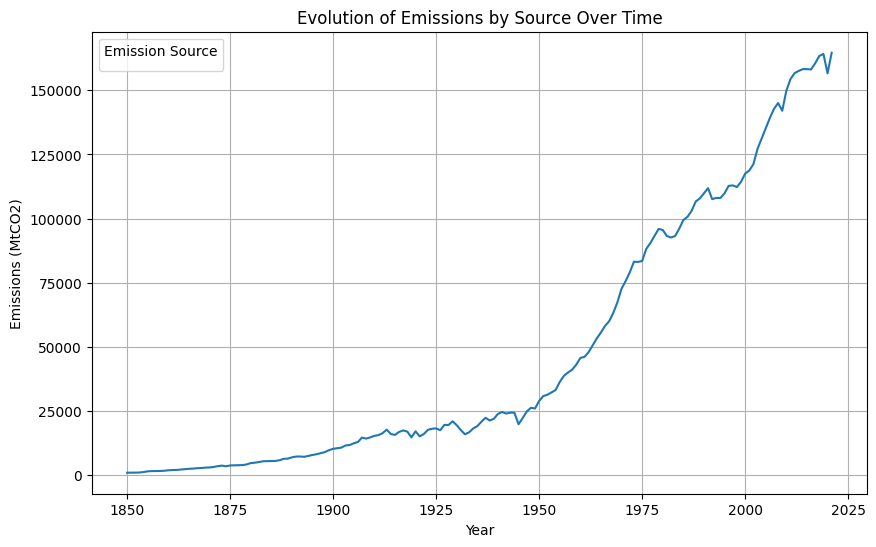

In [20]:
df_it1_grouped = df.groupby("year")['co2'].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(df_it1_grouped["year"], df_it1_grouped['co2'])

plt.xlabel("Year")
plt.ylabel("Emissions (MtCO2)")
plt.title("Evolution of Emissions by Source Over Time")
plt.legend(title="Emission Source")
plt.grid(True)
plt.show()

/tmp/ipykernel_9164/3652705480.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Emission Source")


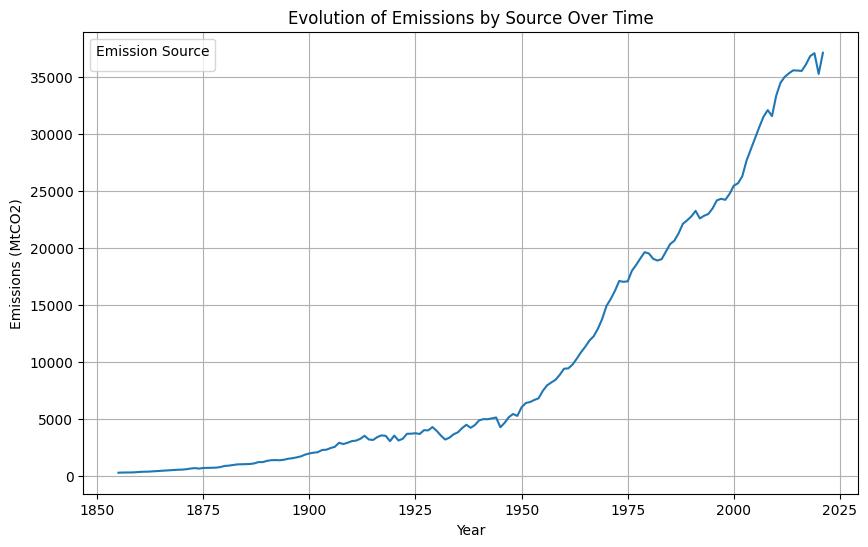

In [33]:
df_world = df[df['country'] == 'World']
# df_it1_grouped = df_world.groupby("year")['co2'].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(df_world["year"], df_world['co2'])

plt.xlabel("Year")
plt.ylabel("Emissions (MtCO2)")
plt.title("Evolution of Emissions by Source Over Time")
plt.legend(title="Emission Source")
plt.grid(True)
plt.show()


       year        co2      diff
23154  1945   4250.264  -860.392
23201  1992  22580.023  -664.784
23218  2009  31564.031  -521.805
23229  2020  35264.086 -1818.473


/tmp/ipykernel_9164/1753638451.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



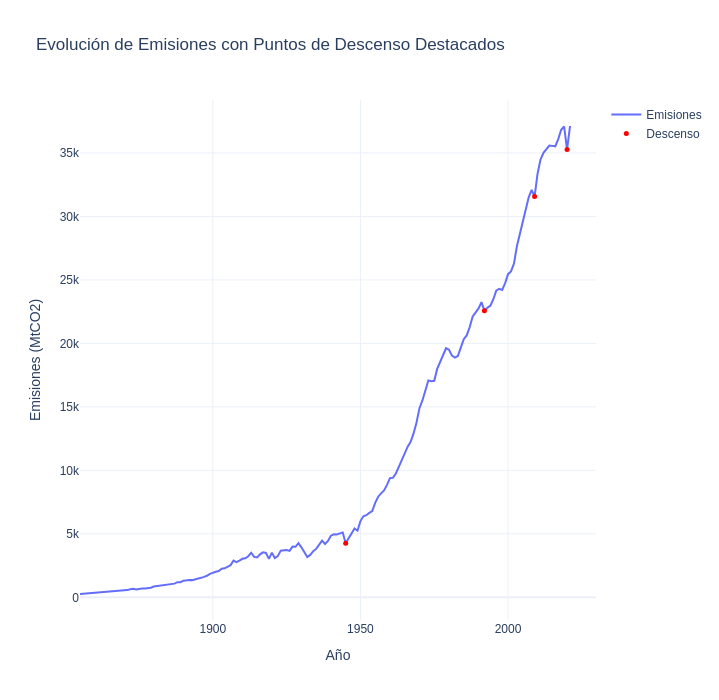

In [62]:
df_world['diff'] = df_world['co2'].diff()  # Calcula la diferencia con el año anterior

# Filtrar para obtener solo los puntos donde la diferencia es negativa (descenso)
descenso_df = df_world[df_world['diff'] < -500]

# Mostrar los años y valores en los que ocurre un descenso
print(descenso_df[['year', 'co2', 'diff']])



# Crear la gráfica de línea
fig = go.Figure()

# Línea principal de emisiones
fig.add_trace(go.Scatter(
    x=df_world["year"], 
    y=df_world['co2'], 
    mode='lines',
    name="Emisiones"
))

# Puntos de descenso
fig.add_trace(go.Scatter(
    x=descenso_df["year"], 
    y=descenso_df['co2'], 
    mode='markers',
    marker=dict(color='red', size=5), 
    name="Descenso"
))

# Configuración de la gráfica
fig.update_layout(
    title="Evolución de Emisiones con Puntos de Descenso Destacados",
    xaxis_title="Año",
    yaxis_title="Emisiones (MtCO2)",
    template="plotly_white",
    width = 700,
    height = 700
)

fig.show()

